# Final Project Report

Numerical Valuation of European and American Options under Kou’s Jump-Diffusion Model

Reference: http://users.jyu.fi/~tene/papers/reportB11-06.pdf https://core.ac.uk/download/pdf/188329925.pdf

Name: Junyu Wang

## Preface

In this report, I will provide all the computation details of the numerical scheme and recursion formulas which posted by Jari Toivanen, the author of the paper. And I will provide the derivation of the Crank-Nicolson scheme of the problem. Finally, I will do the numerical experiments to price the european option under Kou's model using Monte Carlo, Crank-Nicolson and Rannacher time-stepping scheme. 

## Background

### 1. Definition of Jump-Diffusion model

The jump diffusion model is a stochastic process that involves jumps and diffusion. It consists of two parts: a jump part and a diffusion part. The diffusion part is determined by the the driving Brownian motion and the jump part is determined by the Poisson process. The mathematical definition is as follows:

$$
\frac{dx(t)}{x(t-)} = \mu dt + \sigma dW_t + d(\sum_{j=1}^{N_t}{V_j})
$$

where $W_t$ is a standard Brownian motion, $N_t$ is a Poisson process with rate $\lambda$ and $V_js$ are i.i.d random variables.

### 2. Pros

Compared with diffusion process, the jump term makes the pricing model closer to the real world. According to our daily observations, it is obvious that for a diffusion model with continuous paths, its price follows a geometric Brownian motion in a fixed time interval. In this case, the probability of price changing a lot in a short period of time is very low. Therefore, the price we get in the diffusion model is lower than the actual price.

### 3. Application

In modern finance, the model has been used to capture discontinuous behavior in asset pricing. Its application includes options, stocks, bonds, interest rate and etc.

## Introduction

### 1. Kou's Jump-Diffusion Model

Kou’s jump-diffusion model for the value of the underlying asset x is given by

$$
\frac{dx(t)}{x(t-)} = \mu dt + \sigma dW_t + d(\sum_{j=1}^{N_t}{V_j})
$$

where $W_t$ is a standard Brownian motion, $N_t$ is a Poisson process with rate $\lambda$ and $V_js$ are i.i.d log-double-exponential random variables with probability density function

$$
f(y) = 
\begin{cases}
q\alpha_2y^{\alpha_2-1} & y < 1 \\
p\alpha_1y^{-\alpha_1-1} & y \geq 1 \\
\end{cases}
$$

It's a special case of jump diffusion model.

### 2. The PIDE Under Kou's Model

Assume $v(t,x)$ follows Kou’s model the value of a European put option. We have

$$
\begin{cases}
v_t = -\frac{1}{2}\left(\sigma(t,x)x\right)^2v_xx - (r - \lambda\zeta)xv_x + (r + \lambda)v - \lambda\int_{0}^{\infty}{v(t,xy)f(y)}dy \\
v(T,x) = g(x) = \max{\left(K - x, 0\right)}\\
v(t,0) = e^{-r(T-t)}K\\
v(t,\infty) = 0 \\
\end{cases}
$$

for all $t \in [0,T)$ and $x \in (0, \infty)$

## Mathematical Verification

### 1. Discretization of Spatial Derivatives

In this section, I will verify the numerical scheme posted by the author.

Denote $v(t,x_i)$ by $v_i$, we have

$$
\begin{align}
&
-\frac{1}{2}\left(\sigma(t,x_i)x_i\right)^2v_{xx}\left(t,x_i\right) - \left(r - \lambda\zeta\right)x_iv_x\left(t,x_i\right) + \left(r+\lambda\right)v\left(t,x_i\right) \\
&\approx -\frac{1}{2}\left(\sigma(t,x_i)x_i\right)^2 \frac{\frac{v_{i+1} - v_{i}}{\Delta x_i} - \frac{v_{i} - v_{i-1}}{\Delta x_{i-1}}}{\frac{\Delta x_i + \Delta x_{i-1}}{2}} - \left(r - \lambda\zeta\right)x_i\frac{v_{i+1} - v_{i-1}}{\Delta x_i + \Delta x_{i-1}} + \left(r + \lambda\right)v_i \\
&= \left(\frac{\left(r - \lambda\zeta\right)x_i}{\Delta x_{i-1} + \Delta x_i} + \frac{-\left(\sigma(t,x_i)x_i\right)^2 \Delta x_i}{\left(\Delta x_{i-1} + \Delta x_{i}\right)\Delta x_{i-1} \Delta x_{i}}\right)
v_{i-1} 
+ \left(r + \lambda - \frac{\left(\sigma(t,x_i)x_i\right)^2\cdot-\left(\Delta x_{i-1} + \Delta x_i\right)}{\left(\Delta x_{i-1} + \Delta x_{i}\right)\Delta x_{i-1} \Delta x_{i}} \right)
v_i \\
&+ \left(-\frac{\left(r - \lambda\zeta\right)x_i}{\Delta x_{i-1} + \Delta x_i} + \frac{-\left(\sigma(t,x_i)x_i\right)^2 \Delta x_{i-1}}{\left(\Delta x_{i-1} + \Delta x_{i}\right)\Delta x_{i-1} \Delta x_{i}}\right)
v_{i+1} \\
&= \frac{\left(r - \lambda\zeta\right)x_i\Delta x_{i-1} - \left(\sigma(t,x_i)x_i\right)^2}{\left(\Delta x_{i-1} + \Delta x_{i}\right)\Delta x_{i-1}}
v_{i-1} 
+ \left(r + \lambda + \frac{\left(\sigma(t,x_i)x_i\right)^2}{\Delta x_{i-1} \Delta x_{i}} \right)
v_{i}
+ \frac{-\left(r - \lambda\zeta\right)x_i\Delta x_{i} - \left(\sigma(t,x_i)x_i\right)^2}{\left(\Delta x_{i-1} + \Delta x_{i}\right)\Delta x_{i}}
v_{i+1}
\\
\end{align}
$$
  
Then by adding artificial volatility as the author does, we can get:

$$
\begin{align}
D_{i,i-1} &= \frac{\left(r - \lambda\zeta\right)x_i\Delta x_{i-1} - \left(\hat{\sigma}_i(t)x_i\right)^2}{\left(\Delta x_{i-1} + \Delta x_{i}\right)\Delta x_{i-1}} \\
D_{i,i} &= r + \lambda + \frac{\left(\hat{\sigma}_i(t)x_i\right)^2}{\Delta x_{i-1} \Delta x_{i}} \\
D_{i,i+1} &= \frac{-\left(r - \lambda\zeta\right)x_i\Delta x_{i} - \left(\hat{\sigma}_i(t)x_i\right)^2}{\left(\Delta x_{i-1} + \Delta x_{i}\right)\Delta x_{i}} \\
\end{align}
$$

Complete the verification. (Seems the author has typos for this scheme.)

### 2. Derivation of Recursion Formulas

In this section, I will give the detailed derivation of the recursion formulas.

Use the notation in the papaer, we can know

$$
\begin{align}
I &= \int_0^\infty{v(t,z)f(z/x)/x}dz= I^+ + I^- \\
I^- &= q\alpha_2x^{-\alpha_2}\int_0^x{v(t,z)z^{\alpha_2-1}}dz \\
I^+ &= p\alpha_1x^{\alpha_1}\int_x^\infty{v(t,z)z^{-\alpha_1-1}}dz \\
I_i^- &= q\alpha_2x^{-\alpha_2}\int_0^{x_i}{v(t,z)z^{\alpha_2-1}}dz = \sum_{j=0}^{i-1}{I_{i,j}^-} \\
I_i^+ &= p\alpha_1x^{\alpha_1}\int_{x_i}^\infty{v(t,z)z^{-\alpha_1-1}}dz = \sum_{j=0}^{i-1}{I_{i,j}^+} \\
I_{i,j}^- &= q\alpha_2x^{-\alpha_2}\int_{x_j}^{x_{j+1}}{v(t,z)z^{\alpha_2-1}}dz \\
I_{i,j}^+ &= p\alpha_1x^{\alpha_1}\int_{x_j}^{x_{j+1}}{v(t,z)z^{-\alpha_1-1}}dz
\end{align}
$$

To approximate this integral, we use the linear interpolation for $v$ between grid points. For example, for $z \in [x_j, x_{j+1}]$, we have

$$
v(t,x) \approx \frac{x_{j+1} - z}{\Delta x_j}v(t,x_j) + \frac{z - x_j}{\Delta x_j}v(t,x_{j+1})
$$

Insert it into $I_{i,j}^-$, we have

$$
\begin{align}
I_{i,j}^- 
&\approx A_{i,j}^- \\
&= q\alpha_2x_i^{-\alpha_2}\int_{x_j}^{x_{j+1}}{v(t,z)z^{\alpha_2-1}}dz \\
&= q\alpha_2x_i^{-\alpha_2}\int_{x_j}^{x_{j+1}}{\left(\frac{x_{j+1} - z}{\Delta x_j}v(t,x_j) + \frac{z - x_j}{\Delta x_j}v(t,x_{j+1})\right)z^{\alpha_2-1}}dz \\
&= \frac{q\alpha_2x_i^{-\alpha_2}}{\Delta x_j} \int_{x_j}^{x_{j+1}}{\left(\left(x_{j+1} - z\right)v(t,x_j) + \left(z - x_j\right)v(t,x_{j+1})\right)z^{\alpha_2-1}}dz \\
&= \frac{q\alpha_2x_i^{-\alpha_2}}{\Delta x_j}\left(\int_{x_j}^{x_{j+1}}{\left(v(t,x_{j+1}) - v(t,x_j)\right)z^{\alpha_2}}dz + \int_{x_j}^{x_{j+1}}{\left(x_{j+1}v(t,x_j) - x_{j}v(t,x_{j+1})\right)z^{\alpha_2 - 1}}dz\right) \\
&= \frac{q\alpha_2x_i^{-\alpha_2}}{\Delta x_j}\left(\frac{\left(v(t,x_{j+1}) - v(t,x_j)\right)\left(x_{j+1}^{\alpha_2+1} - x_j^{\alpha_2+1}\right)}{\alpha_2 + 1} + \frac{\left(x_{j+1}v(t,x_j) - x_{j}v(t,x_{j+1})\right)\left(x_{j+1}^{\alpha_2} - x_j^{\alpha_2}\right)}{\alpha_2}\right) \\
&= \frac{qx_i^{-\alpha_2}}{\Delta x_j\left(\alpha_2 + 1\right)}\left(\left(-\alpha_2\left(x_{j+1}^{\alpha_2+1} - x_j^{\alpha_2+1}\right) + \left(\alpha_2 + 1\right)x_{j+1}\left(x_{j+1}^{\alpha_2} - x_j^{\alpha_2}\right)\right)v(t,x_j) + \left(\alpha_2\left(x_{j+1}^{\alpha_2+1} - x_j^{\alpha_2+1}\right) - \left(\alpha_2 + 1\right)x_{j}\left(x_{j+1}^{\alpha_2} - x_j^{\alpha_2}\right)\right)v(t,x_{j+1})\right) \\
&= \frac{qx_i^{-\alpha_2}}{\Delta x_j\left(\alpha_2 + 1\right)}\left(\left(\alpha_2x_j^{\alpha_2+1} + x_{j+1}^{\alpha_2+1} - (\alpha_2 + 1)x_{j+1}x_j^{\alpha_2}\right)v(t,x_j) + \left(\alpha_2x_{j+1}^{\alpha_2+1} + x_{j}^{\alpha_2+1} - (\alpha_2 + 1)x_{j}x_{j+1}^{\alpha_2}\right)v(t,x_{j+1})\right) \\
&= \frac{qx_i^{-\alpha_2}}{\Delta x_j\left(\alpha_2 + 1\right)}\left(\left(x_{j+1}^{\alpha_2+1} - (x_{j+1} + \alpha_2\Delta x_j)x_j^{\alpha_2}\right)v(t,x_j) + \left(x_j^{\alpha_2+1} - (x_j - \alpha_2 \Delta x_j)x_{j+1}^{\alpha_2}\right)v(t,x_{j+1})\right) \\
\\
\\
I_{i,0}^- &\approx A_{i,0}^- \\
&= \frac{qx_i^{-\alpha_2}}{\Delta x_0\left(\alpha_2 + 1\right)}\left(\left(x_{1}^{\alpha_2+1} - (x_{1} + \alpha_2\Delta x_0)x_0^{\alpha_2}\right)v(t,0) + \left(x_0^{\alpha_2+1} - (x_0 - \alpha_2 \Delta x_0)x_{1}^{\alpha_2}\right)v(t,x_{1})\right) \\
&= \frac{qx_i^{-\alpha_2}}{x_1\left(\alpha_2 + 1\right)}\left(\left(x_{1}^{\alpha_2+1} - (x_{1} + \alpha_2x_1)0^{\alpha_2}\right)v(t,0) + \left(0^{\alpha_2+1} - (0 - \alpha_2 x_1)x_{1}^{\alpha_2}\right)v(t,x_{1})\right) \\
&= \frac{qx_i^{-\alpha_2}}{\left(\alpha_2 + 1\right)}\left(x_{1}^{\alpha_2}v(t,0) + \alpha_2 x_{1}^{\alpha_2}v(t,x_{1})\right) \\
\\
\\
A_{i+1,j}^- &= \frac{qx_{i+1}^{-\alpha_2}}{\Delta x_j\left(\alpha_2 + 1\right)}\left(\left(x_{j+1}^{\alpha_2+1} - (x_{j+1} + \alpha_2\Delta x_j)x_j^{\alpha_2}\right)v(t,x_j) + \left(x_j^{\alpha_2+1} - (x_j - \alpha_2 \Delta x_j)x_{j+1}^{\alpha_2}\right)v(t,x_{j+1})\right) \\
&= \frac{x_{i+1}^{-\alpha_2}}{x_{i}^{-\alpha_2}}\frac{qx_{i}^{-\alpha_2}}{\Delta x_j\left(\alpha_2 + 1\right)}\left(\left(x_{j+1}^{\alpha_2+1} - (x_{j+1} + \alpha_2\Delta x_j)x_j^{\alpha_2}\right)v(t,x_j) + \left(x_j^{\alpha_2+1} - (x_j - \alpha_2 \Delta x_j)x_{j+1}^{\alpha_2}\right)v(t,x_{j+1})\right) \\
&= \left(\frac{x_{i}}{x_{i+1}}\right)^{\alpha_2}A_{i,j}^-
\\
\\
A_{i+1}^- 
&= \sum_{j=0}^{i}{A_{i+1,j}^-} \\
&= \sum_{j=0}^{i}{A_{i+1,j}^-} + A_{i+1,i}^- \\
&= \sum_{j=0}^{i}{\left(\frac{x_{i}}{x_{i+1}}\right)^{\alpha_2}A_{i,j}^-} + A_{i+1,i}^- \\
&= \left(\frac{x_{i}}{x_{i+1}}\right)^{\alpha_2}A_{i}^- + A_{i+1,i}^- \\
\end{align}
$$

Complete the verification.

### 3. Crank-Nicolson Derivation

To approximate the integral term, we just use the difinition of the Riemann integral.

$$
\begin{align}
\int_{0}^{\infty}{v(t_k,x_iy)f(y)}dy &= \int_0^\infty{v(t_k,z)f(z/x_i)/x_i}dz \\
&= q\alpha_2x_i^{-\alpha_2}\int_0^{x_i}{v(t_k,z)z^{\alpha_2-1}}dz + p\alpha_1x_i^{\alpha_1}\int_{x_i}^\infty{v(t_k,z)z^{-\alpha_1-1}}dz \\
&\approx q\alpha_2x_i^{-\alpha_2}\sum_{j=1}^{i}{v_{j,k}x_j^{\alpha_2-1}\Delta x_j} + p\alpha_1x_i^{\alpha_1}\sum_{j=i+1}^{\infty}{v_{j,k}x_j^{-\alpha_1-1}\Delta x_j} \\
&= j_{i,k}^Tv_{:,k}
\end{align}
$$

$$
\begin{align}
v_t &= -\frac{1}{2}\left(\sigma(t,x)x\right)^2v_xx - (r - \lambda\zeta)xv_x + (r + \lambda)v - \lambda\int_{0}^{\infty}{v(t,xy)f(y)}dy \\
&\Longrightarrow \frac{v_{i,k+1} - v_{i,k}}{\Delta t_k} = \frac{1}{2}\left(D_{i,i-1}(k)v_{i-1,k} + D_{i,i}(k)v_{i,k} + D_{i,i+1}(k)v_{i+1,k} \right) + \frac{1}{2}\left(D_{i,i-1}(k+1)v_{i-1,k+1} + D_{i,i}(k+1)v_{i,k+1} + D_{i,i+1}(k+1)v_{i+1,k+1} \right)
- \frac{\lambda}{2}\left(j_{i,k}^Tv_{:,k} + j_{i,k+1}^Tv_{:,k+1}\right) \\
&\Longrightarrow
\left(-\frac{\Delta t_k}{2}D_{i,i-1}(k+1)\right)v_{i-1,k+1} + \left(-\frac{\Delta t_k}{2}D_{i,i}(k+1) + 1\right)v_{i,k+1} + \left(-\frac{\Delta t_k}{2}D_{i,i+1}(k+1)\right)v_{i+1,k+1} + \frac{\lambda \Delta t_k}{2}j_{i,k+1}^Tv_{:,k+1} = \left(\frac{\Delta t_k}{2}D_{i,i-1}(k)\right)v_{i-1,k} + \left(1 + \frac{\Delta t_k}{2}D_{i,i}(k)\right)v_{i,k} + \left(\frac{\Delta t_k}{2}D_{i,i+1}(k)\right)v_{i+1,k} - \frac{\lambda\Delta t_k}{2}j_{i,k}^Tv_{:,k}
\end{align}
$$

We can write it in matrix form as follows.

$$
A\mathbf{v}_{k+1} + J(k+1)\mathbf{v}_{k+1} = B\mathbf{v}_{k} + J(k)\mathbf{v}_{k} + f
$$

where

$$
\begin{align}
A &=
\begin{bmatrix}
1 - \frac{\Delta t_k}{2}D_{1,1}(k+1) & -\frac{\Delta t_k}{2}D_{1,2}(k+1) & 0 & \cdots & 0\\
-\frac{\Delta t_k}{2}D_{2,1}(k+1) & 1 - \frac{\Delta t_k}{2}D_{2,2}(k+1) & -\frac{\Delta t_k}{2}D_{2,3}(k+1) &  &  \\
0 & -\frac{\Delta t_k}{2}D_{3,2}(k+1)  \\
\vdots  \\
 & & & & - \frac{\Delta t_k}{2}D_{n-1,n}(k+1)\\
0 & & & - \frac{\Delta t_k}{2}D_{n,n-1}(k+1) & 1 - \frac{\Delta t_k}{2}D_{n,n}(k+1)
\end{bmatrix}
\\
\\
B &= 
\begin{bmatrix}
1 + \frac{\Delta t_k}{2}D_{1,1}(k) & \frac{\Delta t_k}{2}D_{1,2}(k) & 0 & \cdots & 0\\
\frac{\Delta t_k}{2}D_{2,1}(k) & 1 + \frac{\Delta t_k}{2}D_{2,2}(k) & \frac{\Delta t_k}{2}D_{2,3}(k) &  &  \\
0 & \frac{\Delta t_k}{2}D_{3,2}(k)  \\
\vdots  \\
 & & & &  \frac{\Delta t_k}{2}D_{n-1,n}(k)\\
0 & & & \frac{\Delta t_k}{2}D_{n,n-1}(k) & 1 + \frac{\Delta t_k}{2}D_{n,n}(k)
\end{bmatrix}
\\
\\
f &=
\begin{bmatrix}
\frac{\Delta t_k}{2}\left(D_{1,0}(k+1)e^{-r(T-t_{k+1})}K + D_{1,0}(k)e^{-r(T-t_{k})}K\right) \\
0 \\
\vdots \\
\vdots \\
0 \\
0 \\
\end{bmatrix}
\\
\\
J(k) 
&= 
\begin{bmatrix}
0 & 0 & \cdots & \\
q\alpha_2x_1^{-\alpha_2}x_1^{\alpha_2 - 1}\Delta x_1 & p\alpha_1x_1^{\alpha_1}x_2^{-\alpha_1 - 1}\Delta x_2 & \cdots &
& \\
q\alpha_2x_2^{-\alpha_2}x_1^{\alpha_2 - 1}\Delta x_1 & q\alpha_2x_2^{-\alpha_2}x_2^{\alpha_2 - 1}\Delta x_2 & p\alpha_1x_2^{\alpha_1}x_3^{-\alpha_1 - 1}\Delta x_3 & \cdots \\
\vdots & \\
q\alpha_2x_n^{-\alpha_2}x_1^{\alpha_2 - 1}\Delta x_1 & q\alpha_2x_n^{-\alpha_2}x_2^{\alpha_2 - 1}\Delta x_2 & \cdots & p\alpha_1x_n^{-\alpha_2}x_n^{\alpha_2 - 1}\Delta x_n
\end{bmatrix}
\end{align}
$$

## Numerical Experiment

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import timeit

In [2]:
def gen_space_path(n, X, gamma, K):
    xs = []
    eq = lambda beta: (1 + np.sinh(beta * (1 - gamma)) / np.sinh(beta * gamma)) * K - X
    beta = fsolve(eq, 0.1)
    for i in range(n+1):
        s = i / n
        xs.append((1 + np.sinh(beta * (s - gamma)) / np.sinh(beta * gamma)) * K)
    return xs

def gen_time_path(m, T, alpha):
    ts = []
    for i in range(m+1):
        if i <= m - 4:
            ts.append(((alpha ** (-i / (m - 2)) - 1)) * T / (alpha**(-1) - 1))
        else:
            ts.append((alpha ** (-(i + m - 4) / (2 * m - 4)) - 1) * T / (alpha**(-1) - 1))
    return ts

We will use same parameters to conduct the numerical experiment for the european option with constant volatility.

### 1. European put option

In [3]:
# Import Data
mu = 0
sigma = 0.2
r = 0
T = 0.2
X = 6
K = 1
lam = 0.2
alpha_1 = 3
alpha_2 = 2
p = 0.5
q = 1 - p
ms = [6, 10, 18, 34, 66]
ns = [40, 80, 160, 320, 640]
alpha = 4
gamma = 0.4


zeta = p * alpha_1 / (alpha_1 - 1) + (1 - p) * alpha_2 / (alpha_2 + 1) - 1

#### 1. Monte Carlo

In [4]:
def kou_jump_diffusion(S_0, mu, sigma, p, q, alpha_1, alpha_2, lam, T, N):
    # Simulate kou's jump diffusion process
    # This is an one-time simulation
    # S_0     = initial price
    # mu      = mean value of Gaussian distribution
    # sigma   = std of Gaussian distribution
    # p       = parameter of log-double-exponential distribution
    # q       = parameter of log-double-exponential distribution
    # p + q   = 1
    # alpha_1 = parameter of log-double-exponential distribution
    # alpha_2 = parameter of log-double-exponential distribution
    # lam     = rate for the Poisson process
    # T       = final time
    # N       = number of total steps
    njump = np.random.poisson(lam*T)
    t_jump = T * np.random.rand(njump)
    u = np.random.binomial(1, p)
    d = 1 - u
    jump = np.sum(u * np.random.exponential(alpha_1, njump) - d * np.random.exponential(alpha_2, njump))
    dt = T / N
    std = np.sqrt(dt)
    S = S_0
    t = 0
    while t < T:
        dS = S * mu * dt + S * sigma * std * np.random.normal()
        S += dS
        t += dt
    S += jump
    return S

In [5]:
# Generate Paths for both time and space
# Only use m = 6, n = 40 for Monte Carlo
# Otherwise it will take too much time
m = 6
n = 40
xs = gen_space_path(n, X, gamma, K)
xs = np.array(xs)[:,0]
ts = np.array(gen_time_path(m, T, alpha))

# Monte Carlo
niterations = 1000
payouts = np.zeros(len(xs))
start = timeit.default_timer()
for i in range(len(xs)):
    for _ in range(niterations):
        final_price = kou_jump_diffusion(xs[i], 0, 0.2, p, 1-p, alpha_1, alpha_2, lam, T, 1000)
        payouts[i] += max(K - final_price, 0)
v_mc = np.exp(-r*T) * payouts / niterations
t_mc = timeit.default_timer() - start

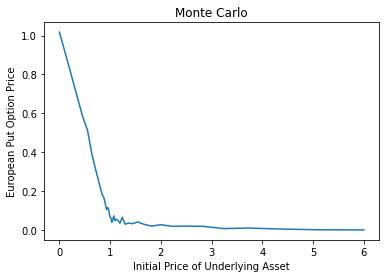

In [6]:
plt.plot(xs, v_mc)
plt.xlabel("Initial Price of Underlying Asset")
plt.ylabel("European Put Option Price")
plt.title("Monte Carlo")
plt.show()

#### 2. Crank-Nicolson

For constant volatility, we have

$$
\begin{cases}
D_{i, i-1}(k) = D_{i, i-1}(k+1) \\
D_{i, i}(k) = D_{i, i}(k+1) \\
D_{i, i+1}(k) = D_{i, i+1}(k+1) \\
\end{cases}
$$

for all $k$.

In [7]:
def D_crank_nicolson(xs):
    # Formulate Matrix D in Crank-Nicolson Numerical Scheme
    # xs = space paths
    diagnoal = np.diag(np.array([r + lam + (sigma * xs[i])**2 / ((xs[i+1] - xs[i]) * (xs[i] - xs[i-1])) for i in range(1,n)]))
    upper_diagonal = np.diag(np.array([(-(r - lam * zeta) * xs[i] * (xs[i+1] - xs[i]) - (sigma * xs[i])**2) / ((xs[i] - xs[i-1] + xs[i+1] - xs[i]) * (xs[i+1] - xs[i])) for i in range (1,n-1)]), 1)
    lower_diagonal = np.diag(np.array([((r - lam * zeta) * xs[i] * (xs[i] - xs[i-1]) - (sigma * xs[i])**2) / ((xs[i] - xs[i-1] + xs[i+1] - xs[i]) * (xs[i] - xs[i-1])) for i in range (2,n)]), -1)
    return diagnoal + upper_diagonal + lower_diagonal

def A_crank_nicolson(ts, D, k):
    # Formulate Matrix A in Crank-Nicolson Numerical Scheme
    # ts = time paths
    # D
    # k = corresponding to time t_k
    dt = ts[k+1] - ts[k]
    dignoal = np.diag(np.array([-dt / 2]*(n-1)))
    upper_diagonal = np.diag(np.array([-dt / 2]*(n-2)), 1)
    lower_diagonal = np.diag(np.array([-dt / 2]*(n-2)), -1)
    A = (dignoal + upper_diagonal + lower_diagonal) * D + np.diag(np.array([1]*(n-1)))
    return A

def B_crank_nicolson(ts, D, k):
    # Formulate Matrix B in Crank-Nicolson Numerical Scheme
    # ts = time paths
    # D
    # k = corresponding to time t_k
    dt = ts[k+1] - ts[k]
    dignoal = np.diag(np.array([dt / 2]*(n-1)))
    upper_diagonal = np.diag(np.array([dt / 2]*(n-2)), 1)
    lower_diagonal = np.diag(np.array([dt / 2]*(n-2)), -1)
    B = (dignoal + upper_diagonal + lower_diagonal) * D + np.diag(np.array([1]*(n-1)))
    return B

def f_crank_nicolson(xs, ts, k):
    # Formulate vector f in Crank-Nicolson Numerical Scheme
    # xs = space paths
    # ts = time paths
    # k = corresponding to time t_k
    f = np.zeros(n-1)
    dt = ts[k+1] - ts[k]
    f[0] = dt * ((r - lam * zeta) * xs[1] * (xs[1] - xs[0]) - (sigma * xs[1])**2) / ((xs[1] - xs[0] + xs[2] - xs[1]) * (xs[1] - xs[0])) * (np.exp(-r * (T - ts[k+1])) * K + np.exp(-r * (T - ts[k])) * K) / 2
    return f

def J_crank_nicolson(xs, k):
    # Formulate Matrix J in Crank-Nicolson Numerical Scheme
    # xs = space paths
    # k = corresponding to time t_k
    J = np.zeros([n-1, n-1])
    q = 1 - p
    for i in range(1,n-1):
        temp = []
        for j in range(1,i+1):
            temp.append(q * alpha_2 * xs[i]**(-alpha_2) * xs[j]**(alpha_2 - 1) * (xs[j+1] - xs[j]))
        for j in range(i+1, n):
            temp.append(p * alpha_1 * xs[i]**(alpha_1) * xs[j]**(-alpha_1 - 1) * (xs[j+1] - xs[j]))
        J[i, :] = np.array(temp)
    return J

def Crank_Nicolson(xs, ts, v_0):
    # Crank-Nicolson 
    # xs = space paths
    # ts = time paths
    # v_0 = value of payout function at all space paths
    v = v_0
    D = D_crank_nicolson(xs)
    for k in range(2, len(ts)):
        k = len(ts) - k
        A = A_crank_nicolson(ts, D, k)
        B = B_crank_nicolson(ts, D, k)
        f = f_crank_nicolson(xs, ts, k)
        J = J_crank_nicolson(xs, k)
        J_forward = J_crank_nicolson(xs, k+1)
        v = np.linalg.inv(B + J) @ ((A + J_forward) @ v - f)
    return v

In [8]:
t_cns = []
v_cns = []
for i in range(len(ms)):
    m = ms[i]
    n = ns[i]
    xs = gen_space_path(n, X, gamma, K)
    xs = np.array(xs)[:,0]
    ts = np.array(gen_time_path(m, T, alpha))
    v_0 = np.clip(K - np.array(xs), 0, K - 0)[1:-1]
    start = timeit.default_timer()
    v_cn = Crank_Nicolson(xs, ts, v_0)
    v_cn = np.insert(v_cn, 0, np.exp(-r * T))
    v_cn = np.append(v_cn, 0)
    v_cns.append(v_cn)
    t_cns.append(timeit.default_timer() - start)

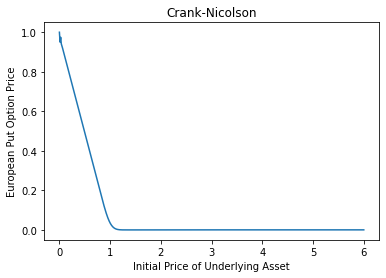

In [9]:
plt.plot(xs, v_cns[-1])
plt.title("Crank-Nicolson")
plt.xlabel("Initial Price of Underlying Asset")
plt.ylabel("European Put Option Price")
plt.show()

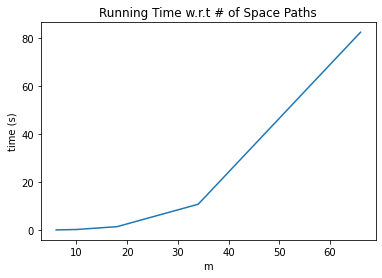

In [10]:
plt.plot(ms, t_cns)
plt.xlabel("m")
plt.ylabel("time (s)")
plt.title("Running Time w.r.t # of Space Paths")
plt.show()

#### 3. Rannacher time-stepping scheme

$$
\begin{align}
A_{i+1,j}^- &= \left(\frac{x_{i}}{x_{i+1}}\right)^{\alpha_2}A_{i,j}^- \\
A_{i+1,j}^+ &= \left(\frac{x_{i+1}}{x_{i}}\right)^{\alpha_1}A_{i,j}^+ \\
\end{align}
$$

We continue the iteration until

$$
||v^l - v^{l+1}||_2 < 10^{-8}
$$

which is the same as paper.

In [11]:
def D_rannacher(xs):
    # Formulate Matrix D in Rannacher time-stepping Numerical Scheme
    # xs = space paths
    d = np.array([r + lam + (sigma * xs[i])**2 / ((xs[i+1] - xs[i]) * (xs[i] - xs[i-1])) for i in range(1,n)])
    d = np.insert(d, 0, r)
    d = np.append(d, 1)
    diagonal = np.diag(d)
    ud = np.array([(-(r - lam * zeta) * xs[i] * (xs[i+1] - xs[i]) - (sigma * xs[i])**2) / ((xs[i] - xs[i-1] + xs[i+1] - xs[i]) * (xs[i+1] - xs[i])) for i in range (1,n)])
    ud = np.insert(ud, 0, 0)
    upper_diagonal = np.diag(ud, 1)
    ld = np.array([((r - lam * zeta) * xs[i] * (xs[i] - xs[i-1]) - (sigma * xs[i])**2) / ((xs[i] - xs[i-1] + xs[i+1] - xs[i]) * (xs[i] - xs[i-1])) for i in range (1,n)])
    ld = np.append(ld, 0)
    lower_diagonal = np.diag(ld, -1)
    return diagonal + upper_diagonal + lower_diagonal

def R_rannacher(xs, v):
    # Formulate Matrix R in Rannacher time-stepping Numerical Scheme
    # xs = space paths
    # v = value of v at all space paths at current time
    R = np.zeros([n+1,n+1])
    for i in range(1, n):
        dx_j = xs[i] - xs[i-1]
        first_element = p * xs[i] ** (-alpha_2) / (alpha_2 + 1) / (dx_j) * ((xs[i] ** (alpha_2 + 1) - (xs[i] + alpha_2 * dx_j) * xs[i-1]**alpha_2) * v[i-1] + (xs[i-1]**(alpha_2 + 1) - (xs[i-1] - alpha_2 * dx_j) * xs[i]**alpha_2) * v[i]) 
        temp = [first_element * (xs[k] / xs[k+1]) ** alpha_2 for k in range(i+1, n)]
        temp = np.insert(temp, 0, first_element)
        temp = np.append(temp, 0)
        temp = np.insert(temp, 0, [0 for _ in range(i)])
        R[:,i-1] += temp
    for i in range(1, n):
        dx_j = xs[i+1] - xs[i]
        first_element = p * xs[i] ** (alpha_1) / (alpha_1 - 1) / (dx_j) * ((xs[i+1] ** (1 - alpha_1) - (xs[i+1] + alpha_1 * dx_j) * xs[i]**(-alpha_1)) * v[i] + (xs[i]**(1 - alpha_1) - (xs[i] + alpha_1 * dx_j) * xs[i+1]**(-alpha_1)) * v[i+1])
        temp = [first_element * (xs[k+1] / xs[k]) ** (alpha_1) for k in range(1, i)]
        temp = np.insert(temp, 0, first_element)
        temp = np.insert(temp, 0, 0)
        temp = np.append(temp, [0 for _ in range(n-i)])
        R[:,i] += temp
    return lam * R

def B_rannacher(ts, D, R, theta, k):
    # Formulate Matrix B in Rannacher time-stepping Numerical Scheme
    # ts = time paths
    # D
    # R
    # theta = scheme parameter
    # k = corresponding to time t_k
    return (np.identity(n+1) + theta[k-1] * (ts[k] - ts[k-1]) * (D - R))

def b_rannacher(ts, D, R, v, theta, k):
    # ts = time paths
    # D
    # R
    # v = value of v at all space paths at current time
    # theta = scheme parameter
    # k = corresponding to time t_k
    # Formulate vector b in Rannacher time-stepping Numerical Scheme
    return (np.identity(n+1) - (1 - theta[k-1]) * (ts[k] - ts[k-1]) * (D - R)) @ v

def T_rannacher(ts, D, theta, k):
    # Formulate Matrix T in Rannacher time-stepping Numerical Scheme
    return np.identity(n+1) + theta[k-1] * (ts[k] - ts[k-1]) * D

def J_rannacher(ts, R, theta, k):
    # Formulate Matrix J in Rannacher time-stepping Numerical Scheme
    return -theta[k-1] * (ts[k] - ts[k-1]) * R

def Rannacher_iterative(xs, ts, theta, v_0):
    # Rannacher time-stepping scheme (Iterative method)
    # v_0 = value of payout function at all space paths
    v = v_0
    D = D_rannacher(xs)
    for k in range(m-1):
        k = m - 1 - k
        R = R_rannacher(xs, v)
        b = b_rannacher(ts, D, R, v, theta, k)
        while True:
            T = T_rannacher(ts, D, theta, k)
            J = J_rannacher(ts, R, theta, k)
            v_new = np.linalg.inv(T) @ (b + J @ v)
            if np.linalg.norm(v_new - v) < 1e-8:
                v = v_new
                break
            v = v_new
    return v

def Rannacher(xs, ts, theta, v_0):
    # Rannacher time-stepping scheme
    # v_0 = value of payout function at all space paths
    v = v_0
    D = D_rannacher(xs)
    for k in range(m-1):
        k = m - 1 - k
        R = R_rannacher(xs, v)
        T = T_rannacher(ts, D, theta, k)
        J = J_rannacher(ts, R, theta, k)
        B = T - J
        b = b_rannacher(ts, D, R, v, theta, k)
        v = np.linalg.inv(B) @ b
    return v

In [12]:
t_rs = []
v_rs = []
for i in range(len(ms)):
    m = ms[i]
    n = ns[i]
    xs = gen_space_path(n, X, gamma, K)
    xs = np.array(xs)[:,0]
    ts = np.array(gen_time_path(m, T, alpha))
    v_0 = np.clip(K - np.array(xs), 0, K - 0)
    theta = np.append([1/2] * (m-5), [1] * 4)
    start = timeit.default_timer()
    v_r = Rannacher(xs, ts, theta, v_0)
    v_rs.append(v_r)
    t_rs.append(timeit.default_timer() - start)

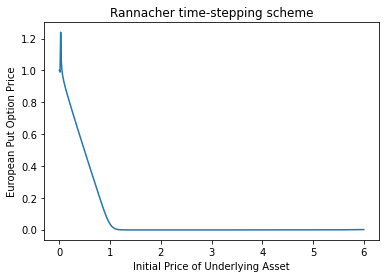

In [13]:
plt.plot(xs, v_rs[-1])
plt.title("Rannacher time-stepping scheme")
plt.xlabel("Initial Price of Underlying Asset")
plt.ylabel("European Put Option Price")
plt.show()

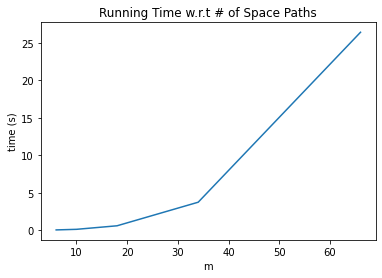

In [14]:
plt.plot(ms, t_rs)
plt.xlabel("m")
plt.ylabel("time (s)")
plt.title("Running Time w.r.t # of Space Paths")
plt.show()

In [15]:
t_ris = []
v_ris = []
for i in range(len(ms)):
    m = ms[i]
    n = ns[i]
    xs = gen_space_path(n, X, gamma, K)
    xs = np.array(xs)[:,0]
    ts = np.array(gen_time_path(m, T, alpha))
    v_0 = np.clip(K - np.array(xs), 0, K - 0)
    theta = np.append([1/2] * (m-5), [1] * 4)
    start = timeit.default_timer()
    v_ri = Rannacher_iterative(xs, ts, theta, v_0)
    v_ris.append(v_ri)
    t_ris.append(timeit.default_timer() - start)

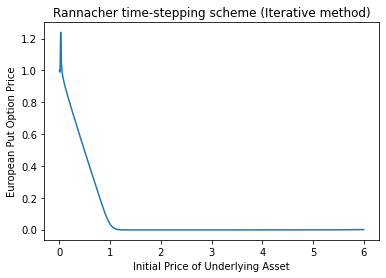

In [16]:
plt.plot(xs, v_ris[-1])
plt.title("Rannacher time-stepping scheme (Iterative method)")
plt.xlabel("Initial Price of Underlying Asset")
plt.ylabel("European Put Option Price")
plt.show()

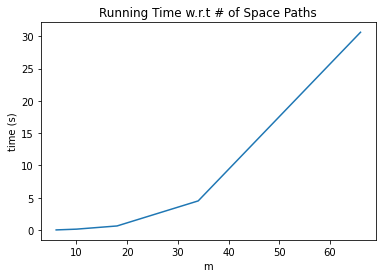

In [17]:
plt.plot(ms, t_ris)
plt.xlabel("m")
plt.ylabel("time (s)")
plt.title("Running Time w.r.t # of Space Paths")
plt.show()

### European call option

We can use the put-call parity to compute the price of a call option.

$$
v_c(t,x) = v_p(t,x) + x - Ke^{-r(T-t)}
$$

#### 1. Monte Carlo

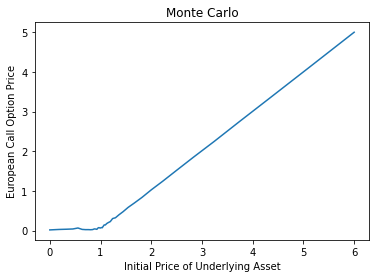

In [18]:
v_put = v_mc
n = ns[0]
xs = np.array(gen_space_path(n, X, gamma, K))[:,0]
v_call = v_put + xs - np.ones(len(xs)) * K * np.exp(-r * T)
plt.plot(xs, v_call)
plt.xlabel("Initial Price of Underlying Asset")
plt.ylabel("European Call Option Price")
plt.title("Monte Carlo")
plt.show()

#### 2. Crank-Nicolson

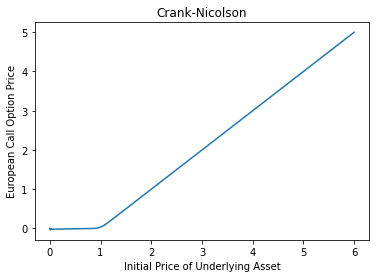

In [19]:
v_put = v_cns[-1]
n = ns[-1]
xs = np.array(gen_space_path(n, X, gamma, K))[:,0]
v_call = v_put + xs - np.ones(len(xs)) * K * np.exp(-r * T)
plt.plot(xs, v_call)
plt.xlabel("Initial Price of Underlying Asset")
plt.ylabel("European Call Option Price")
plt.title("Crank-Nicolson")
plt.show()

#### 3. Rannacher time-stepping scheme

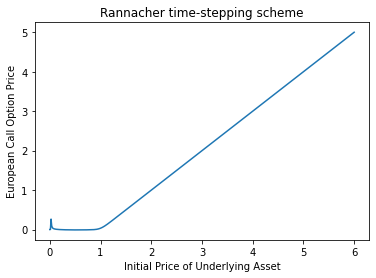

In [20]:
v_put = v_rs[-1]
n = ns[-1]
xs = np.array(gen_space_path(n, X, gamma, K))[:,0]
v_call = v_put + xs - np.ones(len(xs)) * K * np.exp(-r * T)
plt.plot(xs, v_call)
plt.xlabel("Initial Price of Underlying Asset")
plt.ylabel("European Call Option Price")
plt.title("Rannacher time-stepping scheme")
plt.show()

## Summary

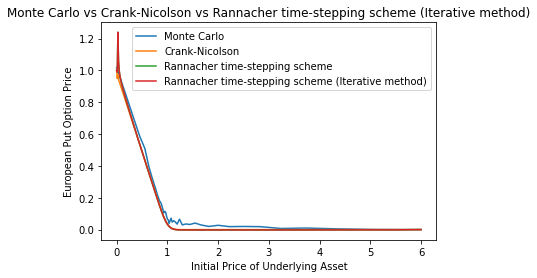

In [21]:
n = ns[0]
xs = np.array(gen_space_path(n, X, gamma, K))[:,0]
plt.plot(xs, v_mc, label="Monte Carlo")
n = ns[-1]
xs = np.array(gen_space_path(n, X, gamma, K))[:,0]
plt.plot(xs, v_cns[-1], label="Crank-Nicolson")
plt.plot(xs, v_rs[-1], label="Rannacher time-stepping scheme")
plt.plot(xs, v_ris[-1], label="Rannacher time-stepping scheme (Iterative method)")
plt.legend()
plt.xlabel("Initial Price of Underlying Asset")
plt.ylabel("European Put Option Price")
plt.title("Monte Carlo vs Crank-Nicolson vs Rannacher time-stepping scheme (Iterative method)")
plt.show()

From the graph, we can see all three methods produce similar results. For Rannacher time-stepping scheme (Iterative method), it seems that the result on the third entry of space grid is inaccurate. I am not sure about the reason though.

In [22]:
pd.DataFrame(data = {
    "Monte Carlo": [t_mc, "N/A", "N/A", "N/A", "N/A"],
    "Crank-Nicolson": t_cns,
    "Rannacher time-stepping scheme": t_rs,
    "Rannacher time-stepping scheme (Iterative method)": t_ris
}, index=["m=%s, n=%s" % (ms[i], ns[i]) for i in range(len(ms))])

,Monte Carlo,Crank-Nicolson,Rannacher time-stepping scheme,Rannacher time-stepping scheme (Iterative method)
"m=6, n=40",120.591,0.049112,0.030307,0.025849
"m=10, n=80",N/A,0.224245,0.109148,0.144079
"m=18, n=160",N/A,1.408028,0.580832,0.638293
"m=34, n=320",N/A,10.760427,3.726253,4.518960
"m=66, n=640",N/A,82.502172,26.398656,30.630756


From the table, we can see Rannacher time-stepping scheme has a huge advantage over speed. This is because we use the recursion formula for the integral term which reduces the operations and it's also cost-effective to compute the inverse a tridiagonal matrix.

## TODO

- Compute the analytical solution of the model using the same parameters and Compare it with our numerial experiment.
- Find the reason why Rannacher time-stepping scheme doesn't perform well on the first few entries.